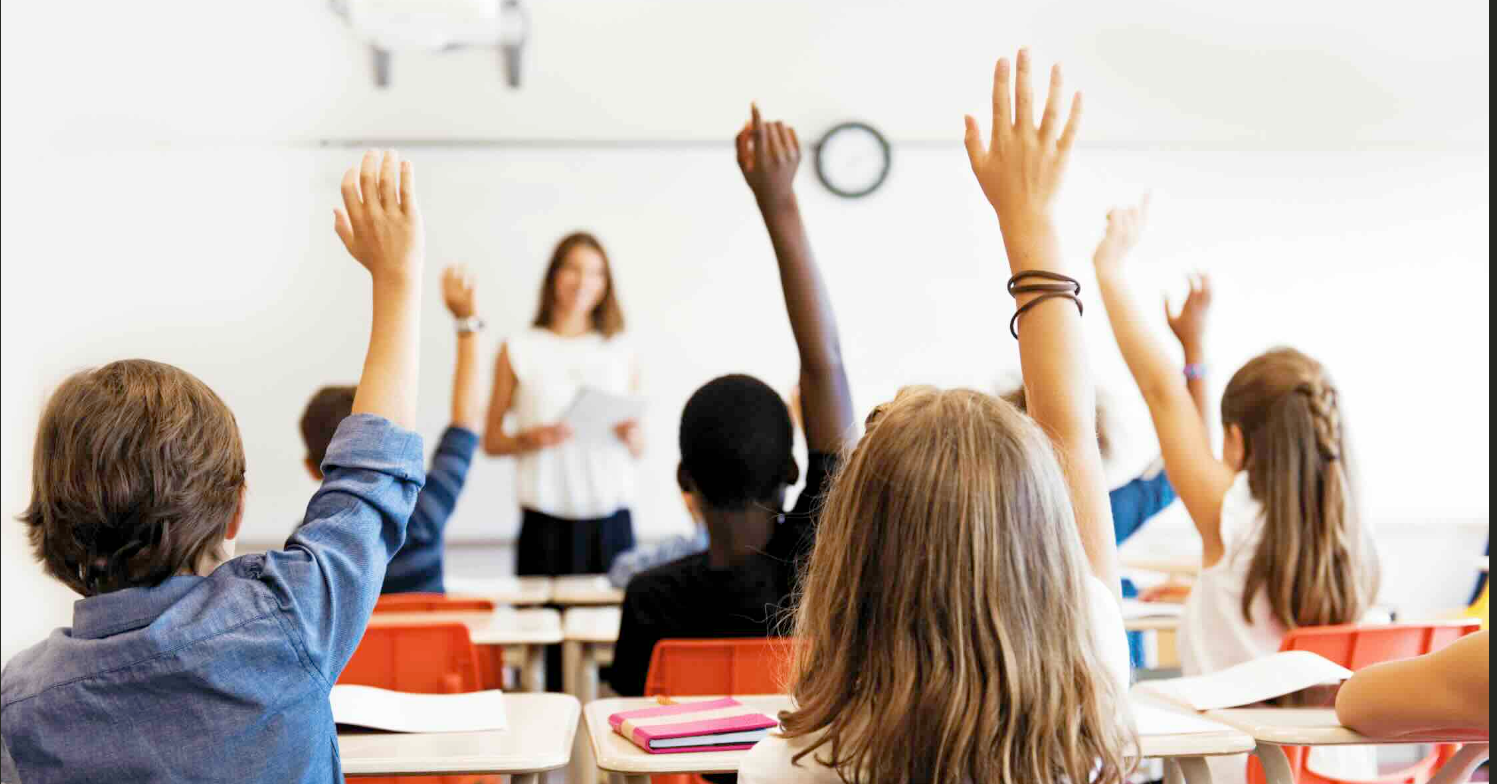

# 📊 Data Visualization Project - Marking Rubric

**🎓 Team member Name:** *Piyush*  
**📁 Project Title:** *Student Performance Analysis Using Visualization*



---

### 🔹 Data Preparation & Cleaning
- [Cleaning and Handling Missing Values — 5 marks](#1)
- [Feature Selection and Engineering — 5 marks](#2) 
- [Ensuring Data Integrity and Consistency — 4 marks](#3) 

---

### 🔹 Exploratory Data Analysis (EDA)
- [Summary Statistics and Insights — 4 marks](#4) 
- [Identifying Patterns, Trends, and Anomalies — 5 marks](#5)
- [Handling Outliers and Data Transformations — 3 marks](#6)

---

### 🔹 Visualization
- [Initial Visual Representation of Key Findings — 4 marks](#8) 

---

**🔢 Total: 30 marks**

---


#### 📥 Importing Libraries and Loading Dataset

We begin by importing the essential Python libraries for data analysis and visualization:

- `pandas` for data manipulation,
- `numpy` for numerical operations,
- `seaborn` and `matplotlib.pyplot` for data visualization.

We also configure the global plot settings for consistency and readability across all visualizations.

Finally, we load the dataset `StudentsPerformance.csv` and display the first few rows to understand its structure.


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set global plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Load the dataset
df = pd.read_csv("StudentsPerformance.csv")

# Preview the data
df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,associate's degree,standard,none,NaN,86.0,84.0
1,female,group B,some college,free/reduced,completed,NaN,66.0,73.0
2,male,group D,bachelor's degree,standard,none,NaN,73.0,72.0
3,male,group C,some college,free/reduced,none,NaN,77.0,73.0
4,male,group E,some college,standard,completed,NaN,83.0,78.0


#### 🔍 Checking Data Types
To understand the structure of our dataset, we inspect the data types of each column using `df.dtypes`.
This helps us verify:
- Whether numerical and categorical features are correctly interpreted.
- If any data type conversions are needed before analysis.


In [41]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

#### 📊 Descriptive Statistics

We use `df.describe()` to generate summary statistics for the numerical features in the dataset. This includes key metrics such as:

- **count**: Number of non-null entries  
- **mean**: Average value  
- **std**: Standard deviation  
- **min** and **max**: Range of values  
- **25%, 50%, 75%**: Quartile values (percentiles)

These insights provide a basic understanding of the distribution and spread of student scores in math, reading, and writing.


In [42]:
df.describe()

,math score,reading score,writing score
count,970.000000,970.000000,970.000000
mean,67.584536,69.064948,67.998969
std,20.217792,14.548127,15.224058
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,57.250000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,78.750000
max,200.000000,100.000000,100.000000


# **1. 🧼 Cleaning and Handling Missing Values — 5 Marks**
<a id="1"></a>

To ensure data integrity and consistency, we begin by identifying and resolving missing values in both numerical and categorical columns.

---

### 🔍 Step-by-Step Process:

1. **Initial Missing Value Check**  
   - Display the count of missing values in each column before applying any transformations.

2. **Imputation for Numerical Columns**  
   - Columns: `math score`, `reading score`, `writing score`  
   - Strategy: Replace missing values with the **median** of each column to minimize the influence of outliers and preserve central tendency.

3. **Imputation for Categorical Columns**  
   - Column: `lunch`  
   - Strategy: Fill missing entries with the **mode** (most frequently occurring value), preserving the dominant category distribution.

4. **Post-Cleaning Validation**  
   - Display the count of missing values again to ensure that all gaps have been appropriately handled.

---

This cleaning process ensures that the dataset is free of missing values and ready for robust analysis and modeling tasks.


In [43]:
def clean_missing_values(df):
    print("Missing values BEFORE cleaning:")
    print(df.isnull().sum())

    # Numeric columns - fill missing with median
    numeric_cols = ['math score', 'reading score', 'writing score']
    for col in numeric_cols:
        if df[col].isnull().sum() > 0:
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"Filled missing '{col}' with median: {median_val}")

    # Categorical column - fill missing with mode
    if df['lunch'].isnull().sum() > 0:
        mode_val = df['lunch'].mode()[0]
        df['lunch'].fillna(mode_val, inplace=True)
        print(f"Filled missing 'lunch' with mode: {mode_val}")

    print("\nMissing values AFTER cleaning:")
    print(df.isnull().sum())

    return df

# Usage
df = clean_missing_values(df)


Missing values BEFORE cleaning:
gender                          0
race/ethnicity                  0
parental level of education     0
lunch                          20
test preparation course         0
math score                     30
reading score                  30
writing score                  30
dtype: int64
Filled missing 'math score' with median: 66.0
Filled missing 'reading score' with median: 70.0
Filled missing 'writing score' with median: 69.0
Filled missing 'lunch' with mode: standard

Missing values AFTER cleaning:
gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


C:\Users\Piyush\AppData\Local\Temp\ipykernel_27832\628259753.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\Piyush\AppData\Local\Temp\ipykernel_27832\628259753.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

## **2. 🛠️ Feature Selection and Engineering — 5 Marks**
<a id="2"></a>

In this step, we enhance the dataset by creating new features that provide deeper insights and improve the analytical value.

---

### ✨ Engineered Features:

1. **`average score`**  
   - Calculated as the mean of the `math score`, `reading score`, and `writing score` for each student.  
   - Serves as a comprehensive metric reflecting overall academic performance.

2. **`result`**  
   - A categorical feature indicating the student's pass/fail status based on the `average score`.  
   - Criteria:  
     - **Pass** if `average score ≥ 40`  
     - **Fail** otherwise  

---

These engineered features facilitate easier summarization, visualization, and can serve as predictors in classification models.


In [44]:
# Feature Engineering: create average score from individual test scores
df['average score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

# Create pass/fail result based on average score threshold
# Threshold of 40 is assumed as passing criteria (adjust based on dataset/domain)
df['result'] = df['average score'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

df[['average score', 'result']].head()


,average score,result
0,78.666667,Pass
1,68.333333,Pass
2,70.333333,Pass
3,72.000000,Pass
4,75.666667,Pass


## **3. Ensuring Data Integrity and Consistency — 4 Marks**
<a id="3"></a>

To maintain a clean and reliable dataset, we standardize textual data and validate categorical variables to avoid inconsistencies caused by formatting variations and duplicate entries.

---

### 🔧 Steps Taken:

1. **Trim Whitespace & Convert to Lowercase**  
   - Applied to the `gender` and `test preparation course` columns to ensure uniform formatting (e.g., `" Female"` → `"female"`).

2. **Standardize Categorical Values**  
   - Verified and standardized category labels, ensuring known expected values (`"male"`, `"female"`, `"none"`, `"completed"`) are used consistently.

3. **Remove Duplicate Rows**  
   - Identified and removed duplicate records to maintain data uniqueness.

4. **Validation**  
   - Printed unique values in cleaned columns to confirm consistency.  
   - Asserted that score columns (`math score`, `reading score`, `writing score`) fall within valid ranges (0 to 100) after normalization.

---

These procedures help prevent data redundancy and inconsistencies, thereby ensuring reliable grouping, accurate analysis, and meaningful visualization.


In [47]:
# Strip spaces and lowercase for consistency
df['gender'] = df['gender'].str.strip().str.lower()
df['test preparation course'] = df['test preparation course'].str.lower().str.strip()

# Check for duplicates and remove them
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
df.drop_duplicates(inplace=True)

from sklearn.preprocessing import MinMaxScaler

# Normalize scores only if any values are outside 0–100
for col in ['math score', 'reading score', 'writing score']:
    if not df[col].between(0, 100).all():
        print(f"Normalizing {col} as it has values outside 0-100.")
        scaler = MinMaxScaler(feature_range=(0, 100))
        df[[col]] = scaler.fit_transform(df[[col]])  # ✅ FIXED: Removed *100
    else:
        print(f"{col} already in range 0-100.")

# Validate score ranges
assert df['math score'].between(0, 100).all(), "Math scores out of range"
assert df['reading score'].between(0, 100).all(), "Reading scores out of range"
assert df['writing score'].between(0, 100).all(), "Writing scores out of range"

# Define consistent categories
df['gender'] = pd.Categorical(df['gender'], categories=['male', 'female'])
df['test preparation course'] = pd.Categorical(df['test preparation course'], categories=['none', 'completed'])

# Check unique values after cleaning
print(df['gender'].unique())
print(df['test preparation course'].unique())


Number of duplicate rows: 0
Normalizing math score as it has values outside 0-100.
reading score already in range 0-100.
writing score already in range 0-100.
['female', 'male']
Categories (2, object): ['male', 'female']
['none', 'completed']
Categories (2, object): ['none', 'completed']


## **4.📈 Summary Statistics and Insights — 4 marks** 
<a id="4"></a>

This section provides a quantitative overview and initial insights from the dataset using descriptive statistics and visualizations.

---

#### 🧮 Descriptive Statistics:
- Used the `describe()` method to summarize key numerical features including mean, standard deviation, minimum, maximum, and quartiles.

#### 🔍 Grouped Analysis:
- Calculated the average `average score` grouped by `gender` and `test preparation course` to investigate differences in performance across these categories.

#### 📊 Visualizations:
- **Gender Distribution:** Count plot showing the number of students by gender.
- **Parental Level of Education:** Horizontal count plot representing the distribution of students by parental education levels.

---

These analyses help identify patterns and trends that can guide further exploration and modeling.


### Summary Statistics ###
        math score  reading score  writing score  average score
count  1000.000000     1000.00000    1000.000000    1000.000000
mean     33.768500       69.09300      68.029000      68.219667
std       9.956872       14.32891      14.994699      14.526405
min       0.000000       17.00000      10.000000       9.000000
25%      28.875000       60.00000      58.000000      58.666667
50%      33.000000       70.00000      69.000000      68.666667
75%      38.125000       79.00000      78.000000      77.666667
max     100.000000      100.00000     100.000000     122.000000

### Average Score by Gender ###
gender
male      66.441877
female    69.834606
Name: average score, dtype: float64

### Average Score by Test Preparation Course ###
test preparation course
none         65.419168
completed    73.049955
Name: average score, dtype: float64


C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_27832\1890110276.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('gender')['average score'].mean())
C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_27832\1890110276.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('test preparation course')['average score'].mean())
C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_27832\1890110276.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  

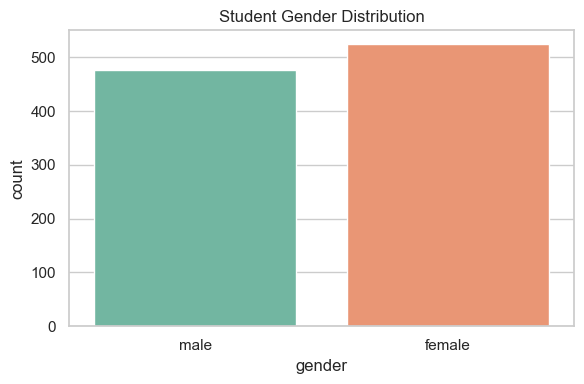

C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_27832\1890110276.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='parental level of education', palette='pastel')


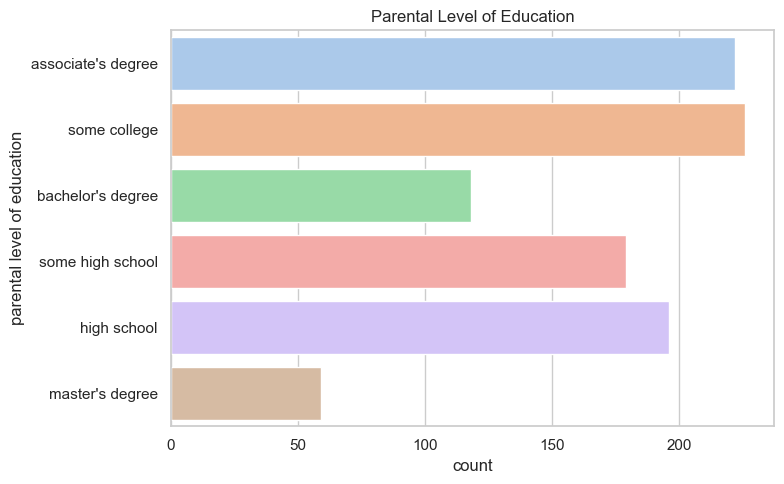

In [48]:
# Summary statistics for numeric columns
print("### Summary Statistics ###")
print(df.describe())

# Grouped means by gender and test preparation course
print("\n### Average Score by Gender ###")
print(df.groupby('gender')['average score'].mean())

print("\n### Average Score by Test Preparation Course ###")
print(df.groupby('test preparation course')['average score'].mean())

# Visualize gender distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='gender', palette='Set2')
plt.title('Student Gender Distribution')
plt.tight_layout()
plt.show()

# Visualize parental level of education distribution
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='parental level of education', palette='pastel')
plt.title('Parental Level of Education')
plt.tight_layout()
plt.show()


<a id="5"></a>

## **5.🔎 Identifying Patterns, Trends, and Anomalies — 5 marks** 

This section explores the dataset through various visualizations to uncover meaningful **patterns**, observe **trends**, and detect potential **anomalies**.

---

#### 📊 Correlation Heatmap  
- Displays correlation coefficients between numerical features, highlighting strong positive or negative relationships for deeper insight.

#### 🎻 Violin Plot: Average Score by Test Preparation Course  
- Shows the distribution and density of `average score` grouped by `test preparation course` status, revealing performance trends and potential outliers.

#### 📦 Boxplots: Score Distributions and Gender Comparison  
- Visualizes the distribution of individual scores (`math score`, `reading score`, `writing score`) to detect spread and outliers.  
- Compares `average score` distributions by `gender`, highlighting variability and anomalies.

#### 📈 Count Plot: Pass/Fail Results by Gender  
- Displays the count of students who passed or failed, segmented by `gender`, allowing analysis of performance disparities across groups.

---

Together, these visualizations provide a comprehensive overview of the dataset’s structure and key insights into academic performance patterns.


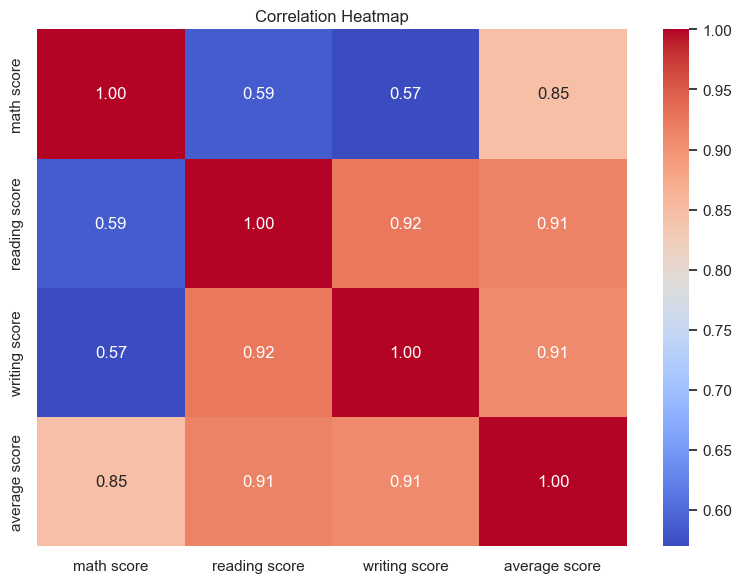

C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_27832\2469388575.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='test preparation course', y='average score', palette='muted')


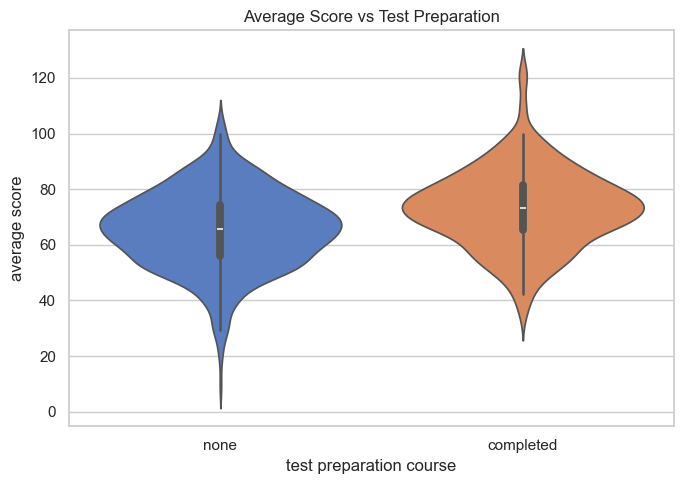

C:\Users\Akshat Raj\AppData\Local\Temp\ipykernel_27832\2469388575.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='gender', y='average score', palette="Set3")


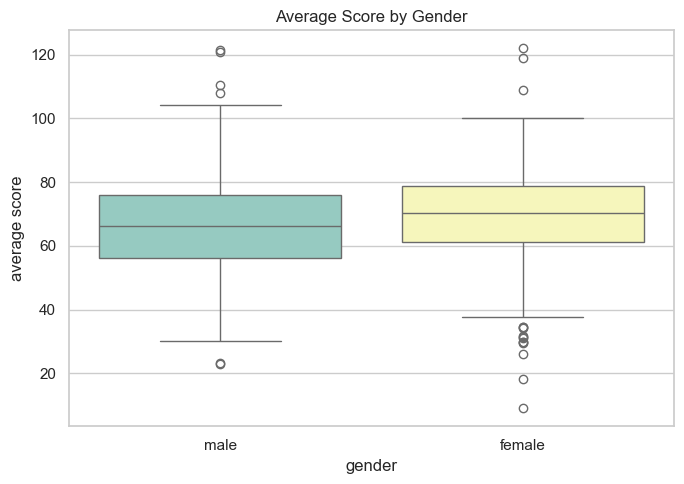

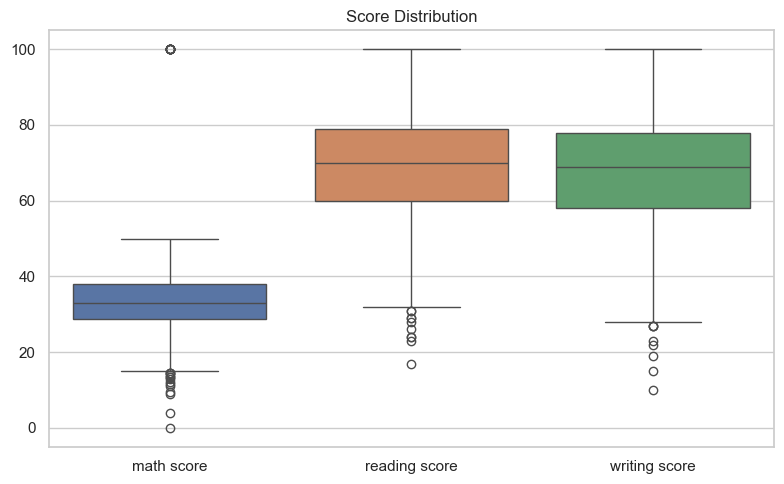

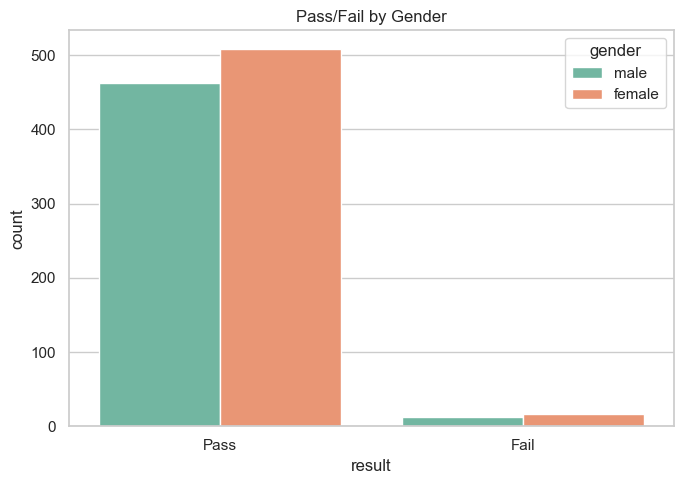

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

# Violin plot: Average score by test preparation course
plt.figure(figsize=(7,5))
sns.violinplot(data=df, x='test preparation course', y='average score', palette='muted')
plt.title("Average Score vs Test Preparation")
plt.tight_layout()
plt.show()

# Boxplot: Average score by gender
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x='gender', y='average score', palette="Set3")
plt.title("Average Score by Gender")
plt.tight_layout()
plt.show()

# Boxplot: Score distributions for math, reading, and writing scores
plt.figure(figsize=(8,5))
sns.boxplot(data=df[['math score', 'reading score', 'writing score']])
plt.title("Score Distribution")
plt.tight_layout()
plt.show()

# Countplot: Pass/Fail results by gender
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='result', hue='gender', palette='Set2')
plt.title("Pass/Fail by Gender")
plt.tight_layout()
plt.show()



<a id="6"></a>

## **6. 🚀 Outlier Handling and Transformation - 5 marks**

This section focuses on improving data quality by detecting and handling outliers, as well as transforming skewed data for better analysis.

#### 🔎 Outlier Detection and Removal  
- Used the **Interquartile Range (IQR) method** to identify and remove outliers in the `math score` column.  
- This step helps prevent extreme values from skewing the analysis.

#### 🔄 Log Transformation  
- Applied a **logarithmic transformation** (`log1p`) to the `average score` to normalize its distribution.  
- Log transformation is especially useful when dealing with skewed data, making patterns easier to observe.

#### 📊 Visualization  
- Displayed the distribution of the log-transformed average scores using a histogram with a KDE curve, allowing us to visually assess the effect of transformation.




Removed 24 outliers from 'math score'


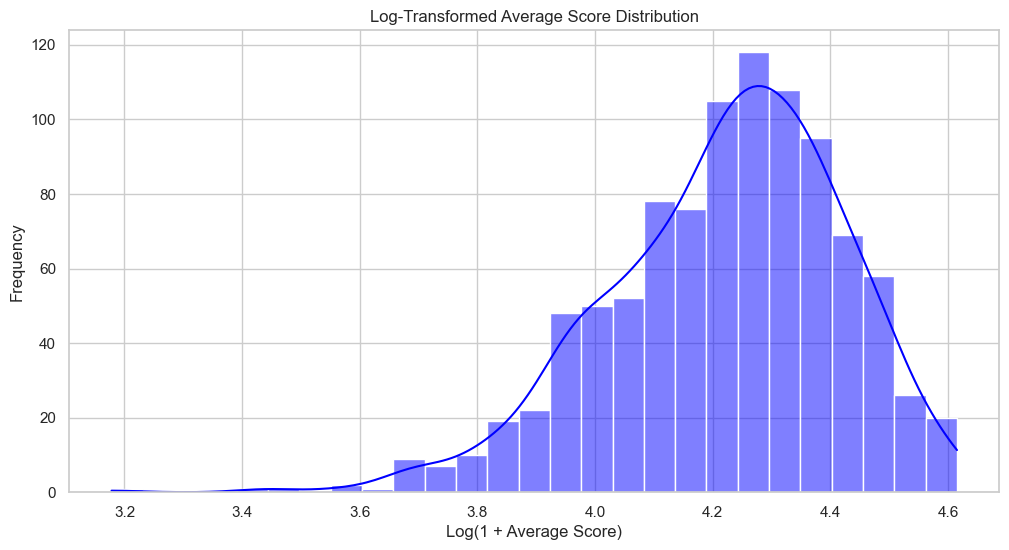

In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 📌 Handle Outliers Using IQR Method for 'math score'
Q1 = df['math score'].quantile(0.25)
Q3 = df['math score'].quantile(0.75)
IQR = Q3 - Q1

before = df.shape[0]
df = df[(df['math score'] >= Q1 - 1.5 * IQR) & (df['math score'] <= Q3 + 1.5 * IQR)]
after = df.shape[0]

print(f"Removed {before - after} outliers from 'math score'")

# 📌 Apply Log Transformation to average score
df['log avg score'] = np.log1p(df['average score'])

# 📊 Visualize Log-Transformed Average Score Distribution
sns.histplot(df['log avg score'], kde=True, color="blue")
plt.title("Log-Transformed Average Score Distribution")
plt.xlabel("Log(1 + Average Score)")
plt.ylabel("Frequency")
plt.show()


## **7** **🔍 Initial Visual Representation of Key Findings**

<a id="7"></a>

This section provides an overview of key relationships between student scores using correlation and scatter visualizations.

#### 📈 Correlation Heatmap of Scores
- Displays the pairwise correlation coefficients between `math score`, `reading score`, and `writing score`.  
- Helps identify which subjects' scores move together, indicating underlying patterns or linked performance.

#### 🎨 Scatter Plot: Reading vs Writing Scores by Gender
- Visualizes the relationship between reading and writing scores with points colored by gender.  
- This highlights potential gender-based clusters or differences in performance trends.

---



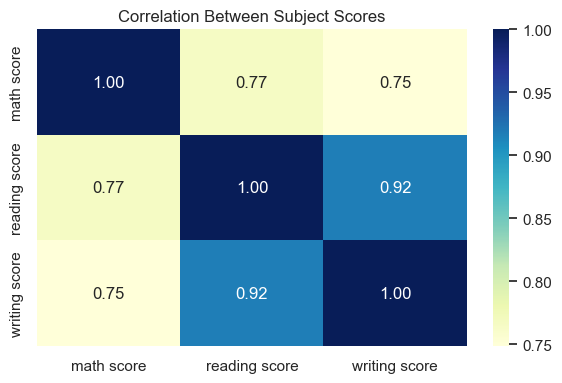

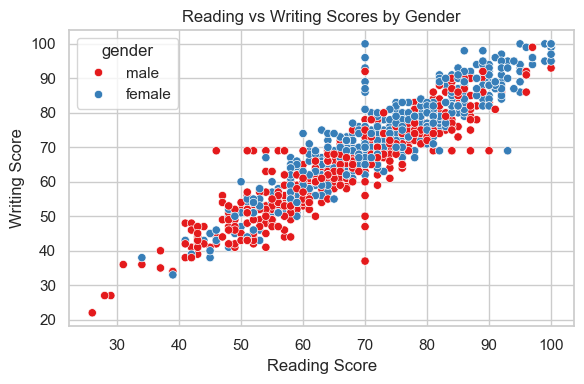

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 📊 Heatmap of Score Correlations
plt.figure(figsize=(6, 4))
sns.heatmap(df[['math score', 'reading score', 'writing score']].corr(), annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Subject Scores")
plt.tight_layout()
plt.show()

# 📈 Scatter Plot: Reading vs Writing by Gender
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='reading score', y='writing score', hue='gender', palette='Set1')
plt.title("Reading vs Writing Scores by Gender")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.tight_layout()
plt.show()
